## Use Pyramid Auro Arima for time series forecasting

In [1]:
# Import modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
#load the data
data = pd.read_csv('D:\\Study\\DataScience\\Data\\MachineLearningData\\TrafficData\\hourlydata.csv')

In [3]:
# Set index as time
data.set_index("time", inplace = True)

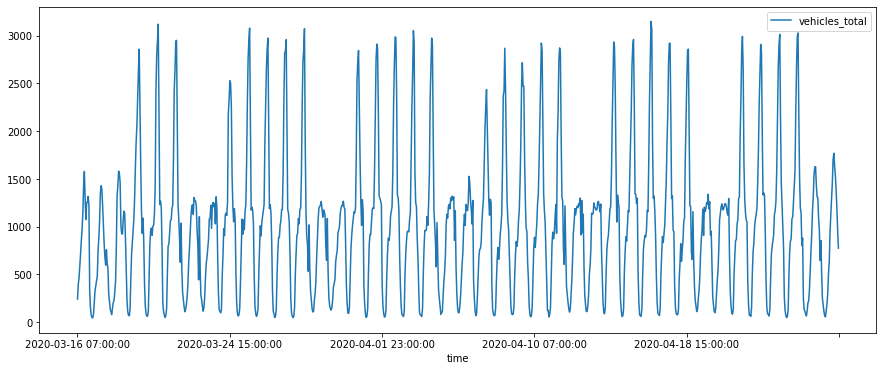

In [4]:
# Plot the dataframe to visualize time series data
data.plot(figsize=(15, 6))
plt.show()

In [6]:
# Import statmdoels for timeseries
import statsmodels.api as sm

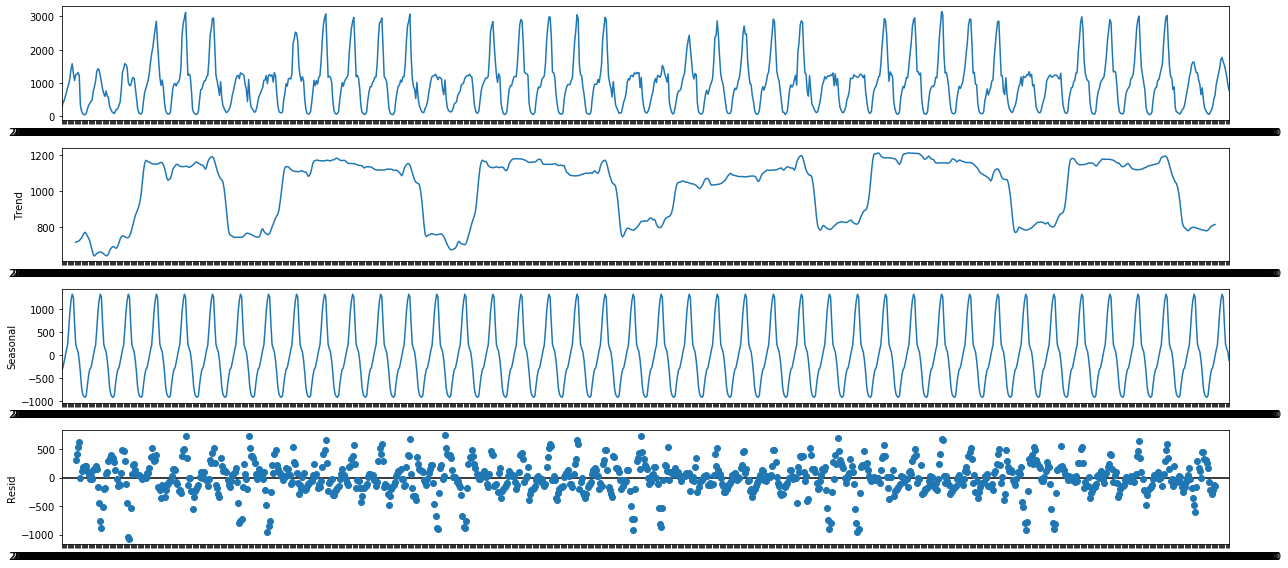

In [7]:
# Use decomposition method to visualize the various components of time series data
from pylab import rcParams

rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(data, model='additive', freq = 24)
fig = decomposition.plot()
plt.show()

In [22]:
import itertools

p = d = q = range(0, 3)
#p = d = q = (0, 1, 2, 3)
pdq = list(itertools.product(p, d, q))
#seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
# Our frequency is weekly with hourly data so instead of 12 provided m as 24*7 = 
seasonal_pdq = [(x[0], x[1], x[2], 168) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...\n')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...

SARIMAX: (0, 0, 1) x (0, 0, 1, 168)
SARIMAX: (0, 0, 1) x (0, 0, 2, 168)
SARIMAX: (0, 0, 2) x (0, 1, 0, 168)
SARIMAX: (0, 0, 2) x (0, 1, 1, 168)


In [ ]:
# Perform Grid Search to find optimal parameters for ARIMA

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data, order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False, enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA {} x {} X 168 - AIC:{}'.format(param, param_seasonal, np.round(results.aic,2)))
        except:
            continue

ARIMA (0, 0, 0) x (0, 0, 0, 168) X 168 - AIC:17106.34
ARIMA (0, 0, 0) x (0, 0, 1, 168) X 168 - AIC:13413.72


In [ ]:
# From the above results """ARIMA (0, 1, 1) x (1, 1, 1, 12) X 12 - AIC:920.32""" gives the mimimum AIC value

mod = sm.tsa.statespace.SARIMAX(data, order=(0, 1, 1), seasonal_order=(1, 1, 1, 168),
                                            enforce_stationarity=False, enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

In [ ]:
# Run model diagonstics
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [ ]:
# Producing and visualizing forecasts

pred_uc = results.get_forecast(steps=200)
pred_ci = pred_uc.conf_int()
ax = data_time.plot(label='Observed Passengers', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Predicted Daily Traffic')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Year')
ax.set_ylabel('Daily Vehicular Traffic')
plt.legend()
plt.show()